In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


warnings.filterwarnings("ignore")

In [26]:
daily_tweet_sentiment = pd.read_csv('stock-price-predictions/tweet/AAPL/daily_tweet_sentiment.csv')
tweet_sentiment = pd.read_csv('stock-price-predictions/tweet/AAPL/tweet_sentiment.csv')
aapl_stock = pd.read_csv('stock-price-predictions/price/AAPL.csv')

In [27]:
aapl_stock['pct-change'] = aapl_stock['Close'].pct_change() * 100

In [28]:
daily_tweet_sentiment = daily_tweet_sentiment.rename(columns={'day':'Date'})

In [29]:
merged_df = pd.merge(daily_tweet_sentiment, aapl_stock, on='Date', how='inner')
merged_df

,Date,sentiment_number,Open,High,Low,Close,Adj Close,Volume,pct-change
0,2013-12-31,0.000000,79.167145,80.182854,79.142860,80.145714,74.571281,55771100,1.172188
1,2014-01-02,0.312500,79.382858,79.575714,78.860001,79.018570,73.522530,58671200,-1.406368
2,2014-01-03,0.000000,78.980003,79.099998,77.204285,77.282860,71.907555,98116900,-2.196585
3,2014-01-06,0.043478,76.778572,78.114288,76.228569,77.704285,72.299644,103152700,0.545302
4,2014-01-07,0.225806,77.760002,77.994286,76.845711,77.148575,71.782608,79302300,-0.715160
...,...,...,...,...,...,...,...,...,...
475,2015-12-24,0.105263,109.000000,109.000000,107.949997,108.029999,104.380112,13570400,-0.534023
476,2015-12-28,0.000000,107.589996,107.690002,106.180000,106.820000,103.210999,26704200,-1.120058
477,2015-12-29,0.222222,106.959999,109.430000,106.860001,108.739998,105.066116,30931200,1.797414
478,2015-12-30,0.100000,108.580002,108.699997,107.180000,107.320000,103.694107,25213800,-1.305865


In [30]:
from sklearn.model_selection import train_test_split

X = merged_df['sentiment_number'].values.reshape(-1,1)
y = merged_df['pct-change'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Daily Tweet Sentiment

In [32]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [34]:
from sklearn.metrics import *

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 2.8015
Mean Absolute Error: 1.3391
R² Score: -0.3070


## 

## Graph

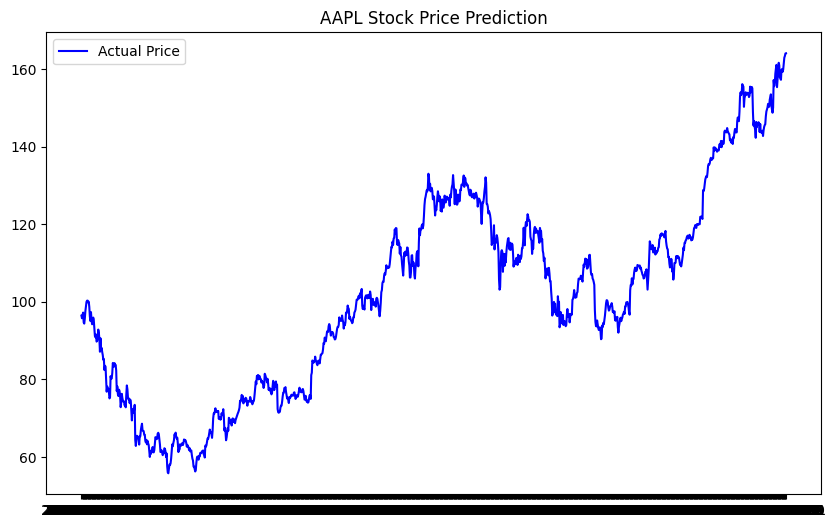

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(aapl_stock['Date'], aapl_stock['Close'], color='blue', label='Actual Price')
plt.title("AAPL Stock Price Prediction")
plt.legend()
plt.show()

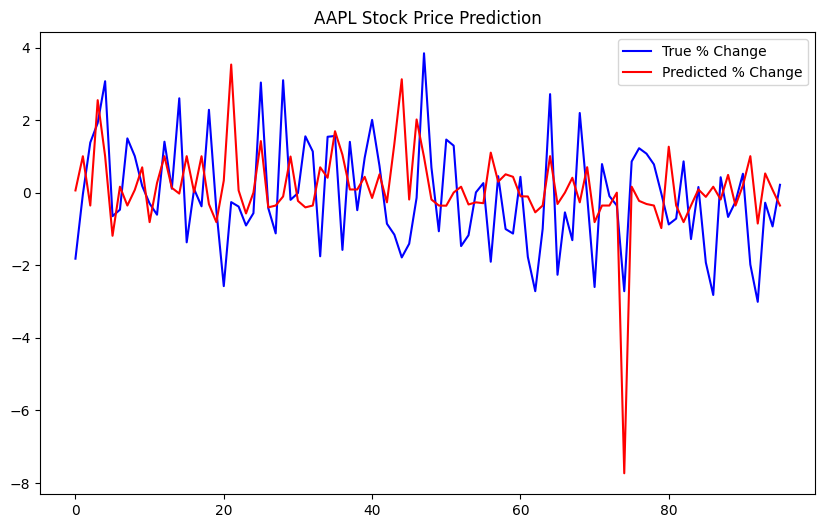

In [36]:
# true value vs predicted value
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='True % Change')
plt.plot(y_pred, color='red', label='Predicted % Change')
plt.title('AAPL Stock Price Prediction')

plt.legend()
plt.show()
